In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import json
from time import time
from datetime import datetime
import seaborn as sns

In [7]:
data = pd.read_json('data/train_new.json')



data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [85]:
print data['ticket_types'][1]


[{u'event_id': 786878, u'cost': 35.0, u'availability': 1, u'quantity_total': 50, u'quantity_sold': 22}, {u'event_id': 786878, u'cost': 35.0, u'availability': 1, u'quantity_total': 50, u'quantity_sold': 3}]


In [17]:
df_sample = data[['acct_type','country','venue_name']][0:10]

In [65]:
def to_datetime(x):
    return datetime.fromtimestamp(int(x))

# .strftime('%Y-%m-%d %H:%M:%S')

data['event_date_dt'] = data['event_start'].map(to_datetime)
data['event_month'] = data['event_date_dt'].map(lambda x: x.year*100 + x.month)
data['category'] = data.acct_type.apply(lambda x: x.split('_')[0])


grouped_by_month = data[data['category'].isin(['fraudster'])].groupby('event_month').count().reset_index()[['event_month','acct_type']]
grouped_by_country = data[data['category'].isin(['fraudster'])].groupby('country').count().reset_index()[['country','acct_type']]

In [66]:
grouped_by_month.head()

,event_month,acct_type
0,200702,2
1,200703,1
2,200803,3
3,200804,3
4,200903,3


In [67]:
grouped_by_country.head()

,country,acct_type
0,,40
1,A1,25
2,AR,4
3,AU,15
4,BE,1


/Users/nelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



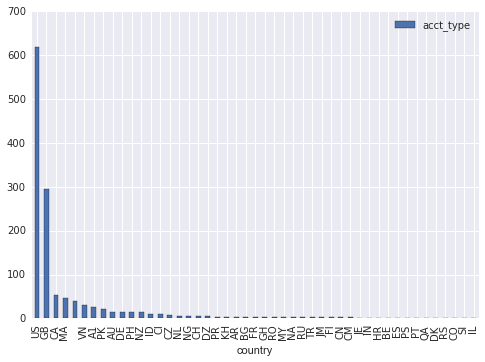

In [75]:
grouped_by_country.sort('acct_type', ascending=False).plot(kind = 'bar', x = 'country');

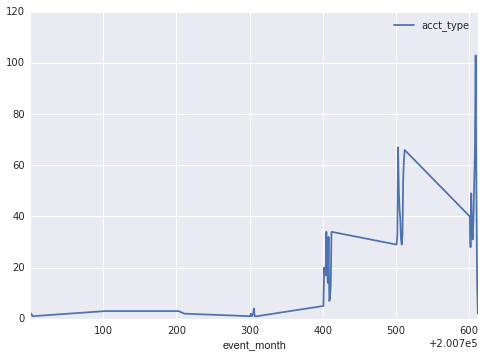

In [80]:
grouped_by_month.plot(kind = 'line', x = 'event_month', y='acct_type')

In [91]:
data_sample = data[0:20].drop(['previous_payouts','ticket_types'], axis = 1)
data_sample.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,event_date_dt,event_month,category,is_fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,2010-02-07 18:00:00,201002,fraudster,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,,US,32.776566,-79.930922,"The Charleston, SC area",SC,2011-01-28 15:00:00,201101,premium,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,2011-01-22 08:30:00,201101,premium,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,,None,NaN,NaN,None,None,2013-02-12 13:00:00,201302,premium,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,2011-02-11 08:00:00,201102,premium,False


In [97]:
data_sample.to_json('data/sample.json', orient = "records", split = 'records')

In [92]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 46 columns):
acct_type             20 non-null object
approx_payout_date    20 non-null int64
body_length           20 non-null int64
channels              20 non-null int64
country               20 non-null object
currency              20 non-null object
delivery_method       20 non-null float64
description           20 non-null object
email_domain          20 non-null object
event_created         20 non-null int64
event_end             20 non-null int64
event_published       20 non-null float64
event_start           20 non-null int64
fb_published          20 non-null int64
gts                   20 non-null float64
has_analytics         20 non-null int64
has_header            19 non-null float64
has_logo              20 non-null int64
listed                20 non-null object
name                  20 non-null object
name_length           20 non-null int64
num_order             20 non-null int64
nu

In [95]:
read_sample = pd.read_json('data/example.json')
read_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, acct_type to venue_state
Data columns (total 20 columns):
0     46 non-null object
1     46 non-null object
10    46 non-null object
11    46 non-null object
12    46 non-null object
13    46 non-null object
14    46 non-null object
15    46 non-null object
16    46 non-null object
17    46 non-null object
18    46 non-null object
19    46 non-null object
2     45 non-null object
3     41 non-null object
4     46 non-null object
5     46 non-null object
6     46 non-null object
7     46 non-null object
8     46 non-null object
9     46 non-null object
dtypes: object(20)
memory usage: 7.5+ KB


In [96]:
read_sample.head()

,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
acct_type,fraudster_event,premium,premium,premium,premium,spammer_warn,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium
approx_payout_date,1266062400,1296720000,1296504000,1298070000,1303095600,1301889600,1300942800,1302494400,1300075200,1299823200,1313881200,1313136000,1296172800,1388966400,1297900800,1300496400,1297909800,1296709200,1298185200,1297314000
body_length,3852,3499,4397,1679,7933,7138,10057,1615,1595,148,3387,6045,2601,12347,2417,117,28,974,4388,974
category,fraudster,premium,premium,premium,premium,spammer,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium,premium
channels,5,0,8,10,8,5,11,6,6,5,11,6,8,6,11,6,5,12,4,12


In [98]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import UpdateMany, UpdateOne
import json

In [103]:
client = MongoClient()
db = client['fraud']
collection = db['cases']


json_file = collection.find()



In [105]:
df = pd.DataFrame(list(json_file))

In [106]:
df.head()

,_id,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,57632804137c2f6d2d7b8b83,premium,1298070000,1679,10,US,USD,1.0,<p><a fishy with local Dept. of Fish and Game...,foragesf.com,...,"[{u'event_id': 1213143, u'cost': 30.0, u'avail...",430,1258180664,3,,,0.000000,0.000000,San Francisco location given in confirmation l...,
1,57632804137c2f6d2d7b8b84,premium,1296504000,4397,8,US,USD,1.0,"<p style=""text-align: center;""><font size=""4"" ...",sffsn.org,...,"[{u'event_id': 1180497, u'cost': 27.5, u'avail...",729,1231436612,3,1 South Van Ness,US,37.775021,-122.419429,,
2,57632804137c2f6d2d7b8b85,spammer_warn,1301889600,7138,5,US,USD,1.0,"<p><span class=""text""><strong><em><font size=""...",ccice.org,...,"[{u'event_id': 1245735, u'cost': 30.0, u'avail...",465,1255857361,4,2 Palo Alto Square,US,37.421022,-122.142107,Nixon Peabody,CA
3,57632804137c2f6d2d7b8b86,premium,1303095600,7933,8,US,USD,1.0,"<div style=""mso-element: frame; mso-element-fr...",dianagats.com,...,"[{u'event_id': 1245411, u'cost': 92.57, u'avai...",814,1225799820,4,1150 South Freeway,US,32.731589,-97.321489,Ft. Worth Business Assistance Center,TX
4,57632804137c2f6d2d7b8b87,premium,1302494400,1615,6,US,USD,0.0,"<table style=""width: 100%;"" border=""0"">\r\n<tb...",racetonowhere.com,...,"[{u'event_id': 1278699, u'cost': 10.0, u'avail...",371,1264709634,3,1200 Carlls Straight Path,US,40.795260,-73.317442,Candlewood Middle School,NY
